In [1]:
import numpy as np
import pandas as pd
import pybrain
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline
from pybrain.tools.shortcuts import buildNetwork
from pybrain.datasets import SupervisedDataSet
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.datasets            import ClassificationDataSet
from pybrain.structure.modules   import SoftmaxLayer

#Se definen las funciones "salida" y "entrena"

In [2]:
def salida(w0,w,X):
    x=[j for j in X]
    sum=w0
    for i in range(len(w)):
        sum=sum+w[i]*x[i]
    if sum > 0:
        res=1
    else:
        res=0
    return res

In [3]:
def entrena(w0,w,X_train,Y_train,n):
    nu=0.0001
    for i in range(len(X_train)):
        sal=salida(w0,w,X_train[i])
        error=Y_train[i]-sal
        w0=w0+nu*error           
        W =[w[j] + nu*error*X_train[i][j] for j in range(n)]
        w=[j for dato in W]
    return w0, w

#Se define la regla

In [4]:
y=[0,1,1,0]
x1=[0,0,1,1]
x2=[0,1,0,1]
x=[]

for i in range(4):
    x.append([x1[i],x2[i]])

X_train=x
Y_train=y
w0=1
w=[]
w.append(1)
w.append(1)
for i in range(100000):
    w0,w=entrena(w0,w,X_train,Y_train,2)

In [5]:
print w0
print w

-1.0001
[1, 1]


In [6]:
x=[0,0]
print salida(w0,w,x)
x=[0,1]
print salida(w0,w,x)
x=[1,0]
print salida(w0,w,x)
x=[1,1]
print salida(w0,w,x)

0
0
0
1


#Se agrega la estructura de pybrain

In [7]:
net = buildNetwork(2, 1, 1, bias=True)
ds = SupervisedDataSet(2,1)

#Se introduce ruido

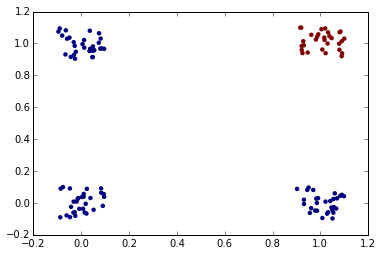

In [8]:
lam = 0.1
def ruido(lam=lam):
    return np.random.random()*lam*2 - lam
for i in range(30):
    ds.addSample((0+ruido(), 0+ruido()), (0,))
    ds.addSample((0+ruido(), 1+ruido()), (0,))
    ds.addSample((1+ruido(), 0+ruido()), (0,))
    ds.addSample((1+ruido(), 1+ruido()), (1,))

plt.scatter(ds['input'][:,0], ds['input'][:,1], c=ds['target'], linewidths=0)

#Entrenamiento

In [9]:
trainer = BackpropTrainer(net, ds)
trainer.train()


0.094756849708901206

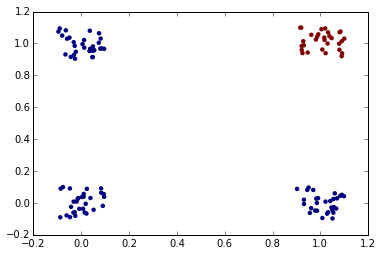

In [10]:
plt.scatter(ds['input'][:,0], ds['input'][:,1], c=ds['target'], linewidths=0)

In [11]:
for input, target in ds:
     print[net.activate(input), target]


[array([ 0.20578661]), array([ 0.])]
[array([ 0.22080227]), array([ 0.])]
[array([ 0.20909418]), array([ 0.])]
[array([ 0.223599]), array([ 1.])]
[array([ 0.20831641]), array([ 0.])]
[array([ 0.22059712]), array([ 0.])]
[array([ 0.21077644]), array([ 0.])]
[array([ 0.2233058]), array([ 1.])]
[array([ 0.20683269]), array([ 0.])]
[array([ 0.21955085]), array([ 0.])]
[array([ 0.21092583]), array([ 0.])]
[array([ 0.22400821]), array([ 1.])]
[array([ 0.20648767]), array([ 0.])]
[array([ 0.21961267]), array([ 0.])]
[array([ 0.21011967]), array([ 0.])]
[array([ 0.22263499]), array([ 1.])]
[array([ 0.20858313]), array([ 0.])]
[array([ 0.22038189]), array([ 0.])]
[array([ 0.20973194]), array([ 0.])]
[array([ 0.22223956]), array([ 1.])]
[array([ 0.20726218]), array([ 0.])]
[array([ 0.22039429]), array([ 0.])]
[array([ 0.21043191]), array([ 0.])]
[array([ 0.22352008]), array([ 1.])]
[array([ 0.20808462]), array([ 0.])]
[array([ 0.21941316]), array([ 0.])]
[array([ 0.20967257]), array([ 0.])]
[arr

In [13]:
err = trainer.trainEpochs(300)

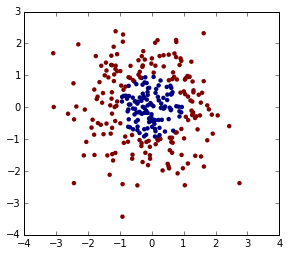

In [14]:
x = np.random.randn(300,2)
y = 2*np.array([float(np.dot(i,i) > 1) for i in x]) - 1
y.shape = (y.shape[0],1)
plt.scatter(x[:,0], x[:,1], c=y, linewidths=0)
plt.axes().set_aspect('equal')

In [15]:
net = buildNetwork(2, 20, 1, bias=True)
ds = SupervisedDataSet(2,1)
ds.setField('input', x)
ds.setField('target', y)

In [17]:
trainer = BackpropTrainer(net, ds)
err_info = trainer.trainEpochs(50)

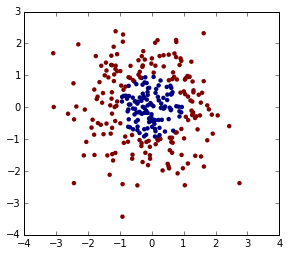

In [21]:
plt.scatter(ds['input'][:,0], ds['input'][:,1], c=ds['target'], linewidths=0)
plt.axes().set_aspect('equal')